In [1]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import time

In [ ]:
# 讀取圖片、轉換色彩空間、顯示圖片
img = cv2.imread('cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(img.shape)
cv2_imshow(img)

(308, 250, 3)

In [ ]:
# 儲存圖片
cv2.imwrite('test.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 8])

True

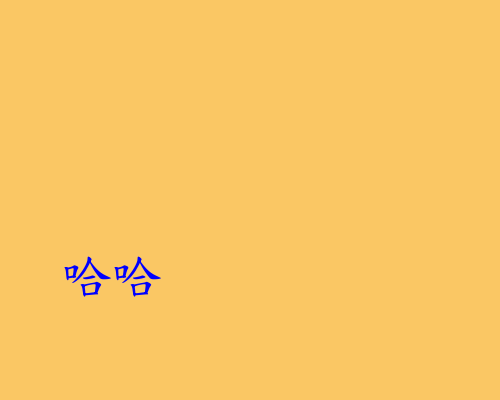

KeyboardInterrupt: ignored

In [ ]:
# 建立一張圖片，繪直線、矩形、圓形
img = np.full((400,500,3), (100,199,250), np.uint8)
# img = np.random.randint(0, 255,(400, 500, 3),np.uint8)
cv2.line(img, (60, 40), (420, 410), (200, 0, 0), 3)
cv2.rectangle(img, (60, 40), (420, 410), (200, 0, 0), -1)
cv2.circle(img, (100, 100), 50, (200, 0, 0), -1)

# 寫字，加動畫效果
for i in range(0,500):
    dp.clear_output(True)
    img = np.full((400,500,3), (100,199,250), np.uint8)
    img = Image.fromarray(img)
    ImageDraw.Draw(img).text((i, 250), '哈哈', (255,0,0), ImageFont.truetype('kaiu.ttf', 50))
    img = np.array(img)
    cv2_imshow(img)
    time.sleep(0.1)

In [ ]:
# 儲存成影片
video = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (500, 400))  # 建立儲存控制變數
for i in range(500):
    img = np.full((400, 500, 3), (100, 199, 250), np.uint8)
    img = Image.fromarray(img)
    ImageDraw.Draw(img).text((i, 200), '哈哈', (255,0,0), ImageFont.truetype('kaiu.ttf', 50))
    img = np.array(img)
    video.write(img)   # 寫入影片影格
video.release()        # 釋放控制變數

In [ ]:
# 在 colab 顯示影片
!ffmpeg -i test.mp4 -vcodec libx264 final.mp4   # 檔案類型轉換，加上空的音軌
import base64
with open('final.mp4', 'rb') as f:
    v = base64.b64encode(f.read()).decode()       # 將影片檔案轉成base64格式
dp.HTML(f'<video src="data:video/mp4;base64,{v}" controls />')   # 顯示影片播放器

In [ ]:
# 影片讀取
cap = cv2.VideoCapture('test.mp4')   # 取得影像來源
cap.set(1, 250)             # 設定來源資訊
while cap.isOpened():       # 判斷影像來源是否有開啟
    ret, img = cap.read()
    if ret:                # 判斷是否有讀到畫面
        cv2_imshow(img)    # img 為讀到的畫面(圖像)變數
    else:
        break

In [ ]:
cap.get(5)       # 取得來源資訊

30.0

In [2]:
# 錄影
cap = cv2.VideoCapture(0)   # 取得影像來源
video = cv2.VideoWriter('record.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (640, 480))  # 建立儲存控制變數
while cap.isOpened():       # 判斷影像來源是否有開啟
    ret, img = cap.read()
    if ret:                 # 判斷是否有讀到畫面
        video.write(img)    # 寫入影片影格
    else:
        break
video.release()        # 釋放控制變數

In [ ]:
# 作業1
def run(start, end, step):
    for i in range(start, end, step):
        dp.clear_output(True)
        img = np.full((300,500,3), (100,199,250), np.uint8)
        cv2.rectangle(img, (i, 100), (100+i, 200), (0, 0, 255), -1)
        cv2_imshow(img)
        time.sleep(0.1)

while True:
    run(10, 400, 20)
    run(390, 0, -20)

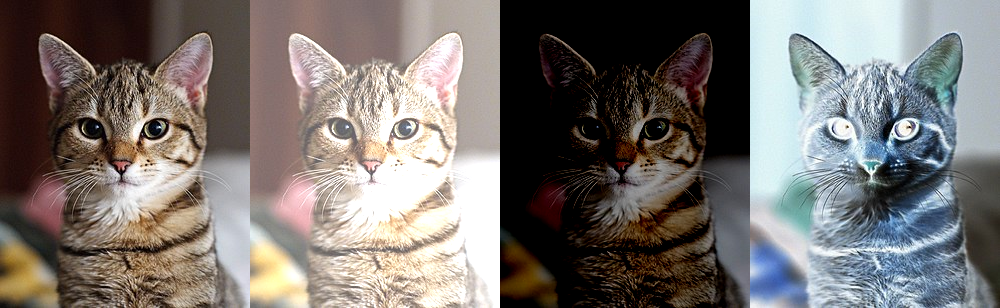

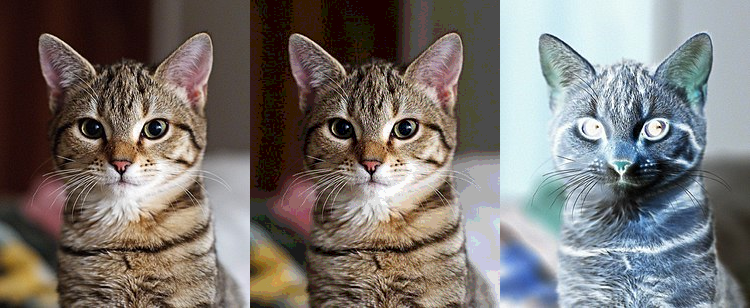

In [ ]:
# 圖像的運算
img = cv2.imread('cat.jpeg')
c = np.full(img.shape, (100,100,100), np.uint8)

# 加減可以用於於亮度調整
r1 = cv2.add(img, c)                   # 圖像相加(大於255的會直接等於255)
r2 = cv2.subtract(img, c)              # 圖像相減(小於0的會直接等於0)
r3 = cv2.absdiff(img, (255,255,255,0)) # 圖像相減(小於0的會做絕對值運算)。 變數2也可以是一個數字(彩色圖像則要四個數字)
img_group1 = np.hstack((img, r1, r2, r3))
cv2_imshow(img_group1)

# 乘除可以用於色彩簡化、圖像壓縮
r4 = cv2.divide(img, (25,25,25,0))     # 圖像相除(未整除的會四捨五入)
r4 = cv2.multiply(r4, (25,25,25,0))    # 圖像相乘(大於255的會直接等於255)
r5 = cv2.bitwise_not(img)              # 各像素值在二進位表示下做not運算
img_group2 = np.hstack((img, r4, r5))
cv2_imshow(img_group2)

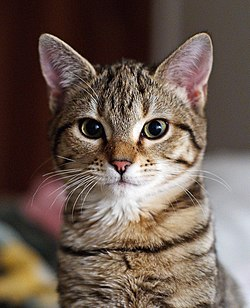

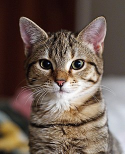

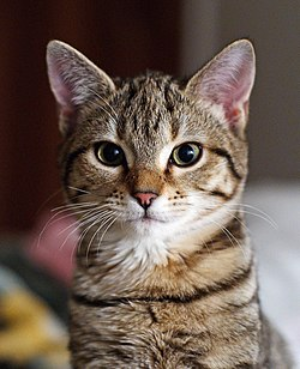

In [ ]:
# 圖像縮放
img = cv2.imread('cat.jpeg')
# 情境一：直接等比例縮放
img_resized_1 = cv2.resize(img, None, fx=0.5, fy=0.5)

# 情境二：給定寬度值等比例縮放
ratio = img.shape[0]/img.shape[1]
w = 300
img_resized_2 = cv2.resize(img, (w, int(w*ratio)))

cv2_imshow(img)
cv2_imshow(img_resized_1)
cv2_imshow(img_resized_2)

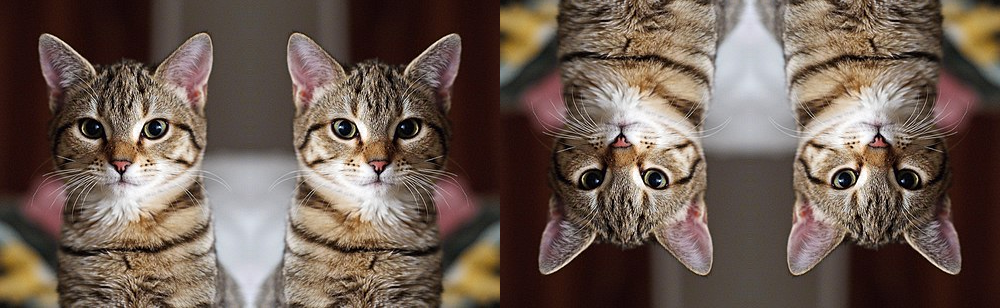

In [ ]:
# 圖像翻轉
img = cv2.imread('cat.jpeg')
img_horizontal_flip = cv2.flip(img, 1)      # 水平翻轉
img_vertical_flip = cv2.flip(img, 0)        # 垂直翻轉
img_both = cv2.flip(img, -1)                # 同時水平垂直翻轉
img_group = np.hstack((img, img_horizontal_flip, img_vertical_flip, img_both))
cv2_imshow(img_group)

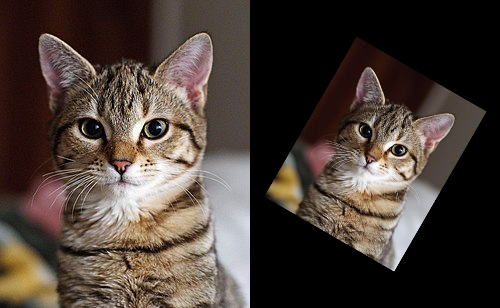

In [ ]:
# 圖像旋轉
img = cv2.imread('cat.jpeg')
img_rotate = cv2.warpAffine(img, 
                            cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), -30, 0.6), 
                            (img.shape[1], img.shape[0]))
img_group = np.hstack((img, img_rotate))
cv2_imshow(img_group)

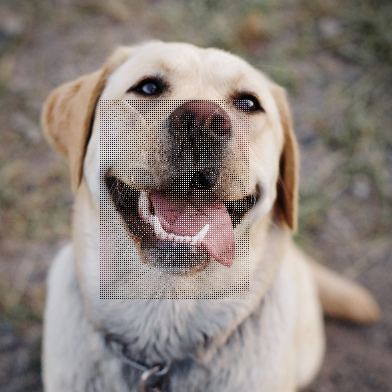

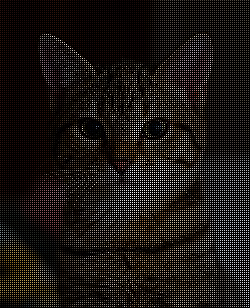

In [ ]:
# 圖像裁切
img = cv2.imread('cat.jpeg')
img_cut_red = img[50:250, 50:200, 2]
cv2_imshow(img_cut_red)

# 圖像複製粘貼
img_cat = cv2.imread('cat.jpeg')
img_dog = cv2.imread('dog.jpeg')
img_dog = cv2.resize(img_dog, None, fx=0.5, fy=0.5)
img_dog[100:300:2, 100:250:2] = img_cat[50:250:2, 50:200:2]
cv2_imshow(img_dog)

# w = np.zeros(img_cat.shape, np.uint8)
# w[::2, ::2] = img_cat[::2, ::2]
# cv2_imshow(w)

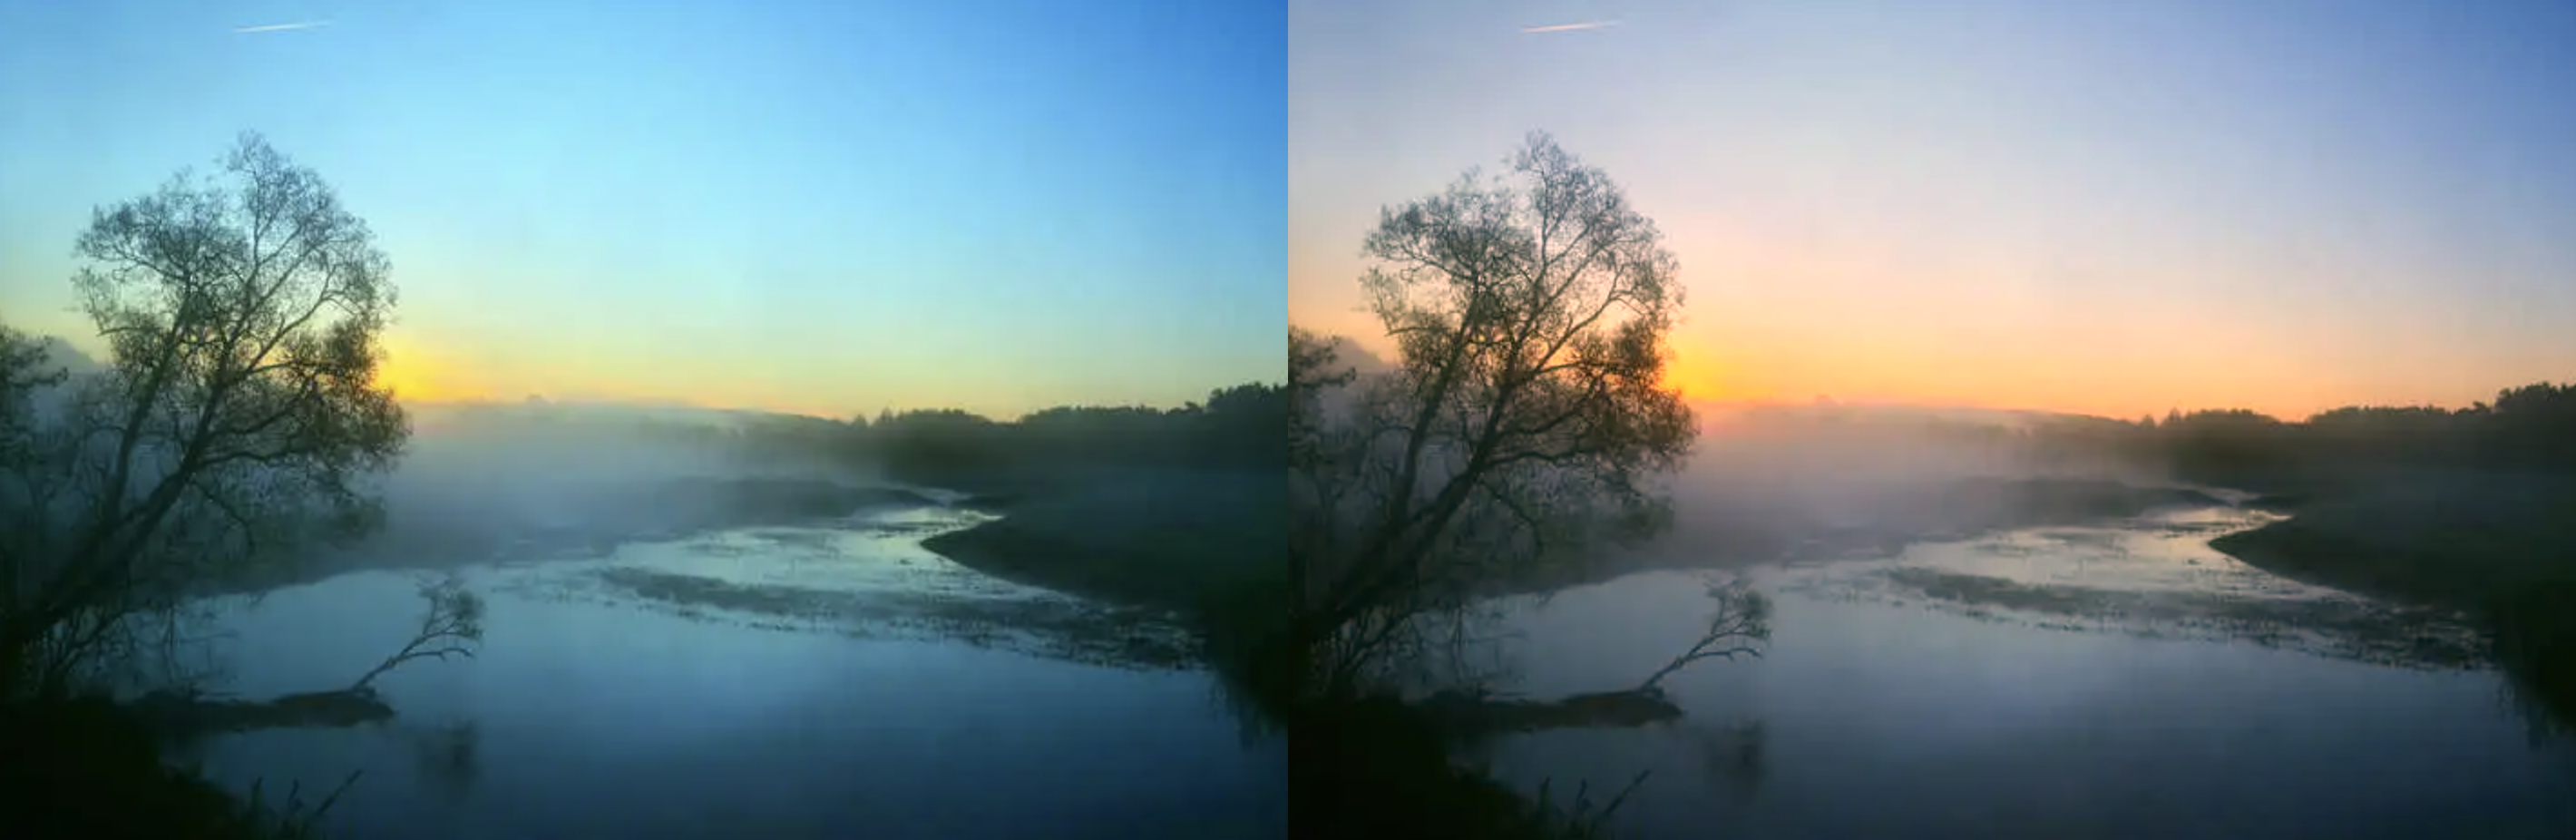

In [ ]:
# 白平衡
img = cv2.imread('test.png')

Bavg = img[:,:,0].mean()
Gavg = img[:,:,1].mean()
Ravg = img[:,:,2].mean()
ColorAvg = (Bavg + Gavg + Ravg)/3

img2 = img.copy()
img2[:,:,0] = cv2.multiply(img[:,:,0], ColorAvg/Bavg)
img2[:,:,1] = cv2.multiply(img[:,:,1], ColorAvg/Gavg)
img2[:,:,2] = cv2.multiply(img[:,:,2], ColorAvg/Ravg)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

In [ ]:
# 白平衡
img = cv2.imread('cafe.png')

Bavg = img[:,:,0].mean()
Gavg = img[:,:,1].mean()
Ravg = img[:,:,2].mean()
ColorAvg = (Bavg + Gavg + Ravg)/3

img2 = img.copy()
img2[:,:,0] = cv2.multiply(img[:,:,0], ColorAvg/Bavg)
img2[:,:,1] = cv2.multiply(img[:,:,1], ColorAvg/Gavg)
img2[:,:,2] = cv2.multiply(img[:,:,2], ColorAvg/Ravg)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

Output hidden; open in https://colab.research.google.com to view.

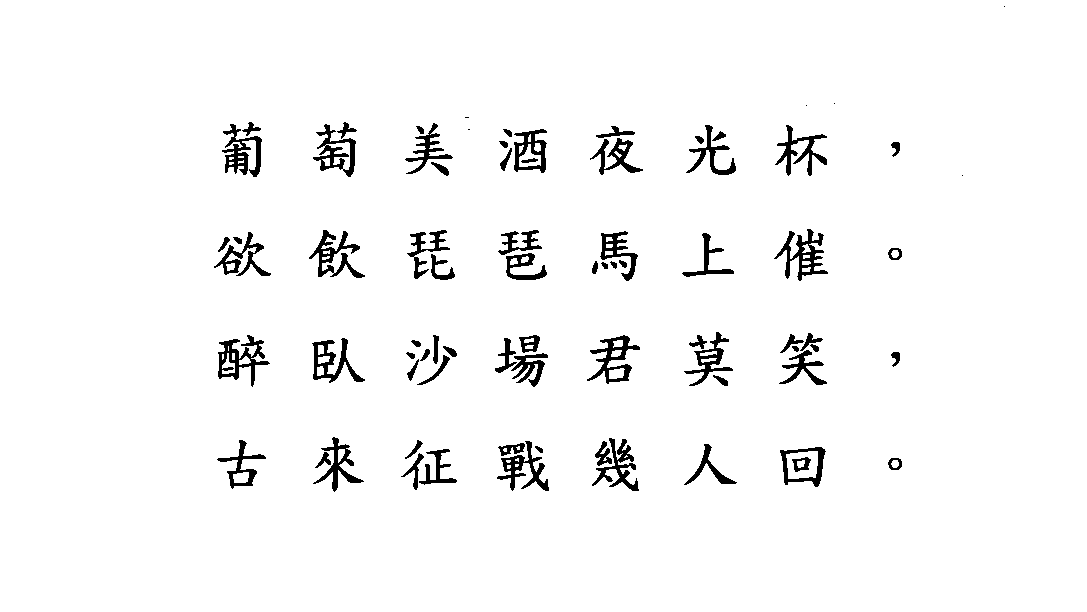

In [ ]:
# 作業2
img_raw = cv2.imread('h2.png')
img_red = img_raw[:,:,2]
img = cv2.subtract(img_red, 253)
img = cv2.multiply(img, 255)
img = cv2.absdiff(img, 255)

cv2_imshow(img)

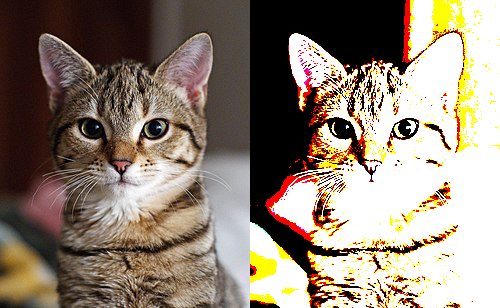

In [ ]:
# 影像二值化
# 法1
# • cv2.THRESH_BINARY => 超過門檻值的像素設為最大值，小於的設為0
# • cv2.THRESH_BINARY_INV => 超過門檻值的像素設為0，小於的設為最大值
# • cv2.THRESH_OTSU => 自動計算門檻值來做二值化，可配合其他方法使用(只接受單一通道的色彩空間)
img = cv2.imread('cat.jpeg')
th, img_binarized = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
img_group = np.hstack((img, img_binarized))
cv2_imshow(img_group)

99.0 101.0 115.0


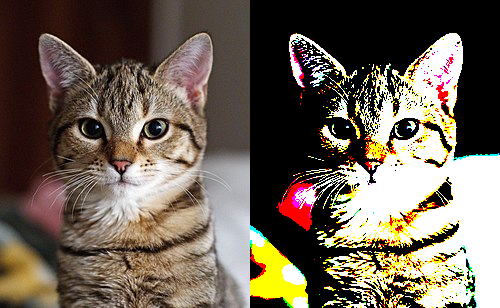

In [ ]:
img = cv2.imread('cat.jpeg')
img2 = img.copy()
th1, img2[:,:,0] = cv2.threshold(img[:,:,0], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
th2, img2[:,:,1] = cv2.threshold(img[:,:,1], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
th3, img2[:,:,2] = cv2.threshold(img[:,:,2], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th1, th2, th3)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

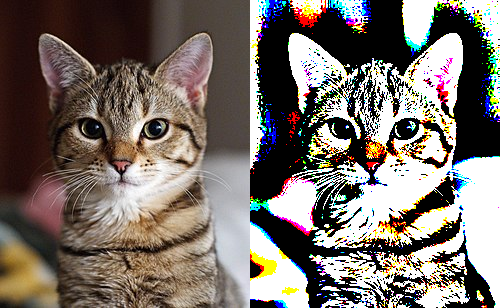

In [ ]:
# 影像二值化 
# 法2，adaptiveThreshold 會自動計算門檻值，跟 threshold 函式的 THRESH_OTSU 方法不同在於他會將整張圖像分成數個小區塊分別去計算(只接受單一通道的色彩空間)
# • cv2.ADAPTIVE_THRESH_MEAN_C: 計算區塊大小內的平均值再減去微調值
# • cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 計算區塊大小內的高斯加權平均值值再減去微調值
img = cv2.imread('cat.jpeg')
img2 = img.copy()
img2[:,:,0] = cv2.adaptiveThreshold(img[:,:,0], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img2[:,:,1] = cv2.adaptiveThreshold(img[:,:,1], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img2[:,:,2] = cv2.adaptiveThreshold(img[:,:,2], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

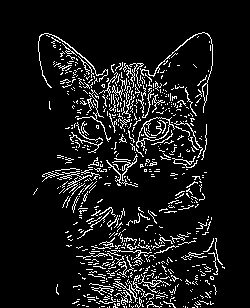

In [ ]:
# 邊緣偵測
img = cv2.imread('cat.jpeg')
img_canny = cv2.Canny(img, 250, 300)       # 先用大的門檻值檢測邊緣，再用小的門檻值將檢測出來的結果線條連起來
cv2_imshow(img_canny)

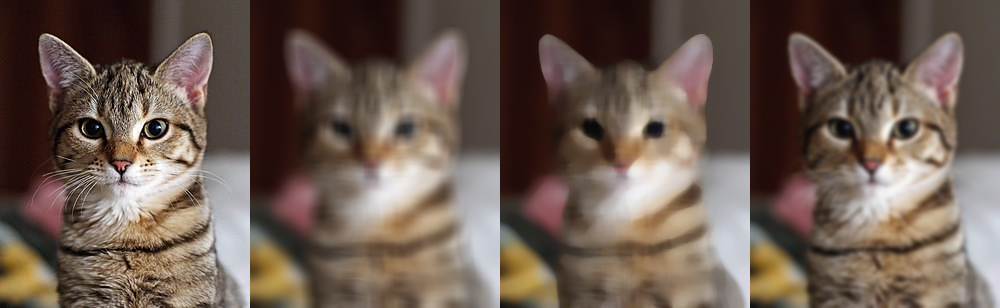

In [ ]:
# 模糊化
img = cv2.imread('cat.jpeg')
# 法1：平均值模糊法(統計範圍內的色彩值平均)
img_mean_blur = cv2.blur(img, (15, 15))      # Tuple 類型: (寬, 高)

# 法2：中值模糊法(將處理範圍內的色彩值做排序，取順序在中間的)
img_median_blur = cv2.medianBlur(img, 15)    # 純數值，必須是單數

# 法3：高斯模糊
img_gaussian_blur = cv2.GaussianBlur(img, (15, 15), 2)
img_group = np.hstack((img, img_mean_blur, img_median_blur, img_gaussian_blur))
cv2_imshow(img_group)

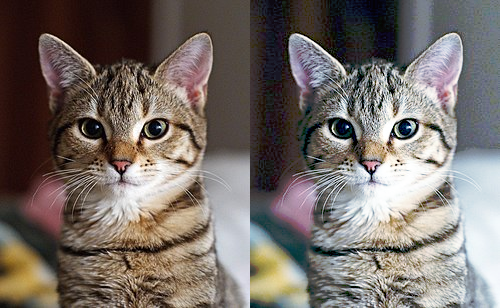

In [ ]:
# 銳利化
# 直方圖均衡化法，只接受單一通道色彩空間
img = cv2.imread('cat.jpeg')
img2 = img.copy()
img2[:,:,0] = cv2.equalizeHist(img2[:,:,0])
img2[:,:,1] = cv2.equalizeHist(img2[:,:,1])
img2[:,:,2] = cv2.equalizeHist(img2[:,:,2])
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

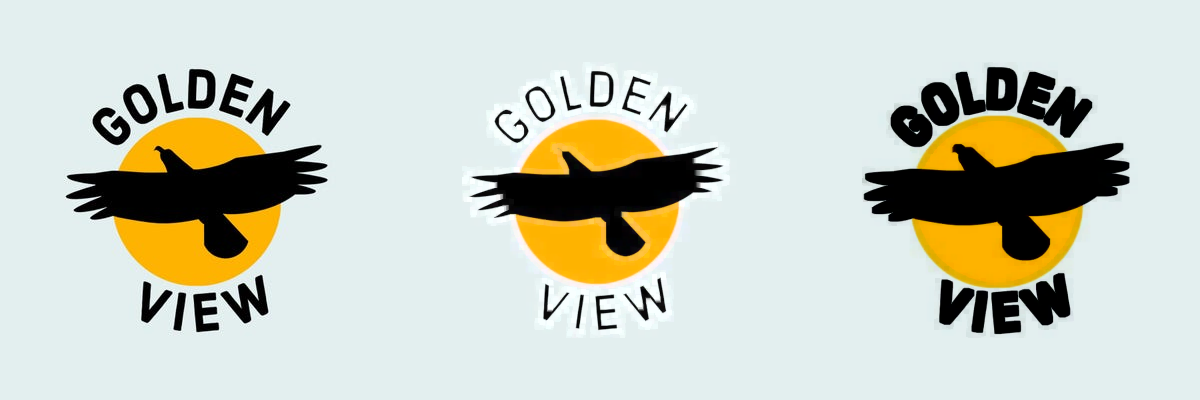

In [ ]:
# 膨脹：色彩值高的會侵蝕色彩值低的
img = cv2.imread('logo.jpeg')
img_dilate = cv2.dilate(img, np.ones((5,5)))

# 侵蝕：色彩值低的會侵蝕色彩值高的
img_erode = cv2.erode(img, np.ones((5,5)))
img_group = np.hstack((img, img_dilate, img_erode))
cv2_imshow(img_group)

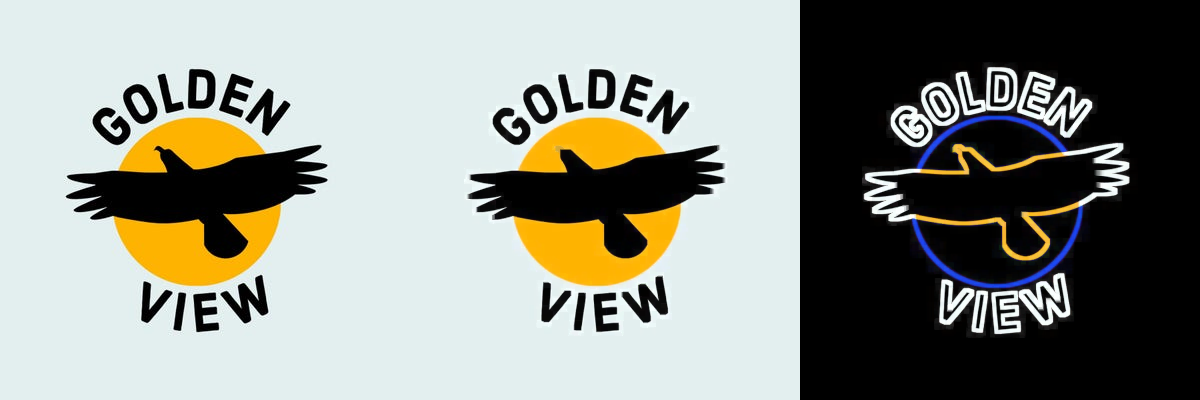

In [ ]:
# 膨脹侵蝕一來一回可以去除比較小的雜訊
img = cv2.imread('logo.jpeg')
img_1 = cv2.dilate(img, np.ones((5,5)))
img_2 = cv2.erode(img_1, np.ones((5,5)))

# 類似的方法有 cv2.morphologyEx()
# • cv2.MORPH_OPEN:先執行侵蝕後執行膨脹
# • cv2.MORPH_CLOSE:先執行膨脹後執行侵蝕
# • cv2.MORPH_GRADIENT:執行膨脹與侵蝕產生的變化差
img_3 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((5,5)))
img_group = np.hstack((img, img_2, img_3))
cv2_imshow(img_group)

In [ ]:
kernel = np.ones((3, 3), np.uint8)
kernel1 = np.ones((3, 3), np.uint8)

img = cv2.imread('cat.jpeg')
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (15, 15), 2)
canny = cv2.Canny(img, 250, 300)
dilate = cv2.dilate(canny, kernel, iterations=1)
erode = cv2.erode(dilate, kernel1, iterations=1)

cv2_imshow(blur)
cv2_imshow(canny)
cv2_imshow(dilate)
cv2_imshow(erode)

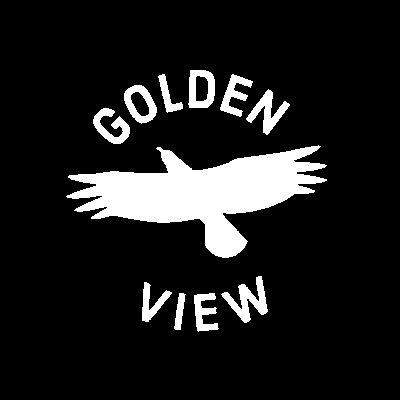

In [ ]:
# 色彩篩選。判斷圖像裡的各像素是否在指定色彩範圍內，傳回一張與傳入變數相同大小的黑白圖像，在範圍內的像素會被設白色，否為則黑色。
# 依照色彩空間的不同可傳進陣列或單一數值
img = cv2.imread('logo.jpeg')
img_filter = cv2.inRange(img, (0,0,0), (30,30,30))
cv2_imshow(img_filter)

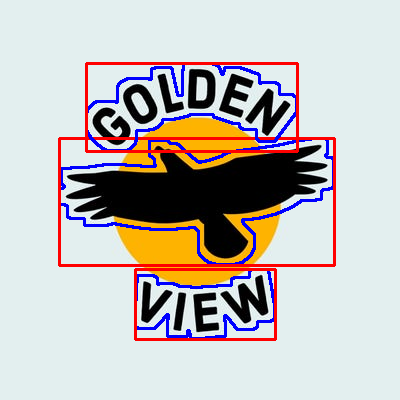

In [ ]:
# 取得輪廓
img = cv2.imread('logo.jpeg')
img_filter = cv2.inRange(img, (0,0,0), (30,30,30))
p, t = cv2.findContours(img_filter, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# 繪製輪廓
cv2.drawContours(img, p, -1, (255,0,0),3)
cv2_imshow(img)

# 透過膨脹先將一起的元素聚合在一起，再抓輪廓，可以抓到一個小區域範圍
img = cv2.imread('logo.jpeg')
img_filter = cv2.inRange(img, (0,0,0), (30,30,30))
img_dilate = cv2.dilate(img_filter, np.ones((15,15)))
p, t = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(p)):
    cv2.drawContours(img, p, i, (255,0,0),2)
    x, y, w, h = cv2.boundingRect(p[i])
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    # cv2_imshow(img[y:y+h, x:x+w])       # 可用在定位圖片裡面的某個物體
cv2_imshow(img)

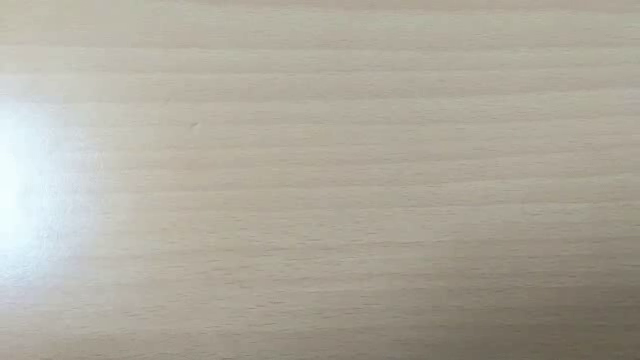

In [ ]:
# 作業三
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

cap = cv2.VideoCapture('h3.mp4')
while cap.isOpened():
    dp.clear_output(True)
    ret, img = cap.read()
    if ret:               
        img_filter = cv2.inRange(img, (72,3,7), (255,160,84))     # (112,43,27), (174,90,44)
        img_dilate = cv2.dilate(img_filter, np.ones((5,9)), iterations=5)
        p, t = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        for i in range(len(p)):
            x, y, w, h = cv2.boundingRect(p[i])
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2_imshow(img)
    else:
        break

    # time.sleep(0.05)

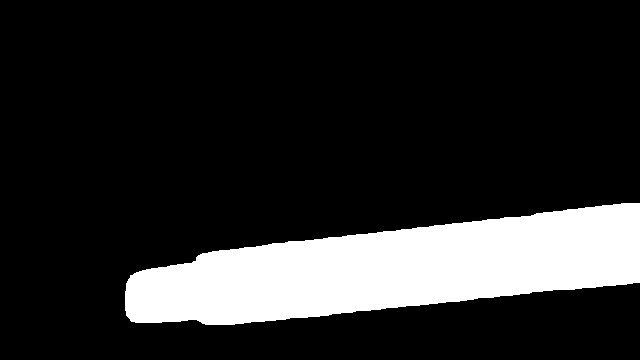

In [ ]:
img = cv2.imread('bi1.png')
img_filter = cv2.inRange(img, (70,3,7), (255,160,84))     # (110,38,27), (174,90,44)
img_dilate = cv2.dilate(img_filter, np.ones((20,25)))
# img_dilate = cv2.erode(img_dilate, np.ones((8,8)))
p, t = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(p)):
    x, y, w, h = cv2.boundingRect(p[i])
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
cv2_imshow(img_dilate)

In [ ]:
# cap = cv2.VideoCapture('h3.mp4')
# while cap.isOpened():
#     ret, img = cap.read()
#     if ret: 
#         cv2_imshow(img)
#     else:
#         break

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

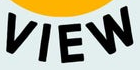

VIE



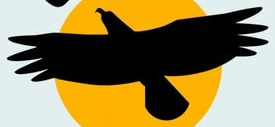

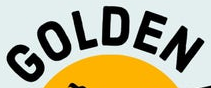

ordey



In [ ]:
# 文字辨識 - 1
import pytesseract as pt
img = cv2.imread('logo.jpeg')
img_filter = cv2.inRange(img, (0,0,0), (30,30,30))
img_dilate = cv2.dilate(img_filter, np.ones((15,15)))
p, t = cv2.findContours(img_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(len(p)):
    x, y, w, h = cv2.boundingRect(p[i])
    #   cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    cv2_imshow(img[y:y+h, x:x+w])
    res = pt.image_to_string(img[y:y+h, x:x+w], "eng")
    print(res)
# cv2_imshow(img)

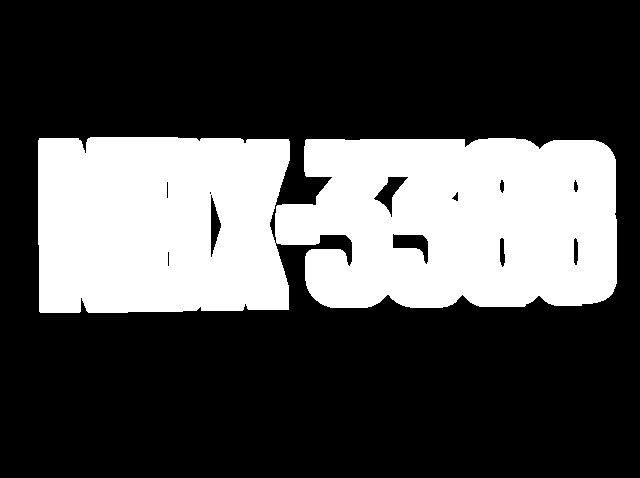

In [ ]:
# 文字辨識 - 2
import pytesseract as pt
img = cv2.imread('car.png')
img_filter = cv2.inRange(img, (0,0,0), (50,50,50))
img_dilate = cv2.dilate(img_filter, np.ones((20,25)))
p, t = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(p)):
    x, y, w, h = cv2.boundingRect(p[i])
    # cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    img_r = img_filter[y:y+h, x:x+w]
    cv2_imshow(img_r)
    res = pt.image_to_string(img_r, "mylag")
    print(res)
cv2_imshow(img_dilate)

In [ ]:
img = cv2.imread('myfont.png')
pt.image_to_string(img, "mylag")

'AJV6-8688\n\x0c'

In [ ]:
!python training.py

In [ ]:
!apt install libzbar-dev
!pip install pyzbar

QRCODE
Rect(left=16, top=16, width=100, height=100)
b'https://test33.com'


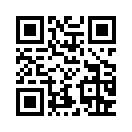

In [ ]:
# 條碼偵測 -- 英文
from pyzbar import pyzbar
img = cv2.imread('qrcode.png')
res = pyzbar.decode(img)
print(res[0].type)
print(res[0].rect)
print(res[0].data)
cv2_imshow(img)

QRCODE
Rect(left=12, top=12, width=63, height=63)
珊珊


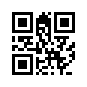

In [ ]:
# 條碼偵測 -- 中文
img = cv2.imread('qrcode_china.png')
res = pyzbar.decode(img)
print(res[0].type)
print(res[0].rect)
try:
    print(res[0].data.decode('utf-8').encode('sjis').decode('utf-8'))
except:
    print(res[0].data.decode('utf-8'))
cv2_imshow(img)

MEBKM:TITLE:QR Code Generator;URL:http://qr.calm9.com/;;
https://portal.ym.edu.tw/umchi/SlotCard/Main.aspx
MEBKM:TITLE:QR Code Generator;URL:http://qr.calm9.com/;;
https://portal.ym.edu.tw/umchi/SlotCard/Main.aspx
HTTPS://MAGICLEN.ORG
HTTPS://MAGICLEN.ORG


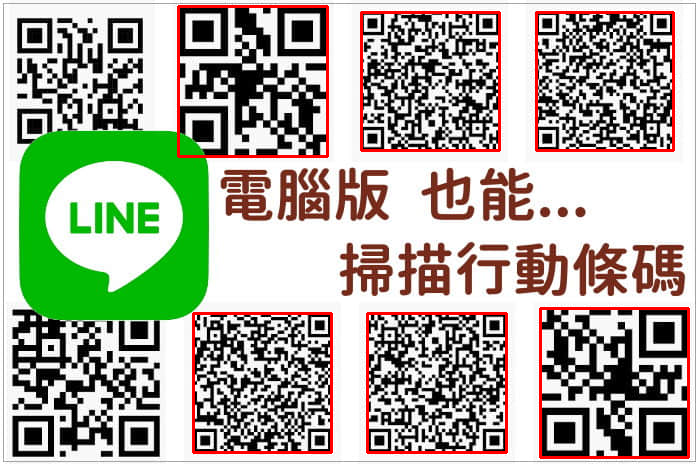

In [ ]:
# 條碼偵測 -- 一次識別多個
img = cv2.imread('qrcode_many.jpeg')
reses = pyzbar.decode(img)
for res in reses:
    x,y,w,h = res.rect
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    try:
        print(res.data.decode('utf-8').encode('sjis').decode('utf-8'))
    except:
        print(res.data.decode('utf-8'))
cv2_imshow(img)

In [ ]:
# 辨識
img = cv2.imread('people.jpeg')
cls = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')      # .xml 文檔記得要在同一個目錄下
data = cls.detectMultiScale(img, minNeighbors=3, minSize=(15,15))
for x,y,w,h in data:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255),2)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 辨識 - 訓練自己的分類器文件
!unzip classifier_training_colab.zip
!python classifier_training_colab/training.py     # 訓練過程

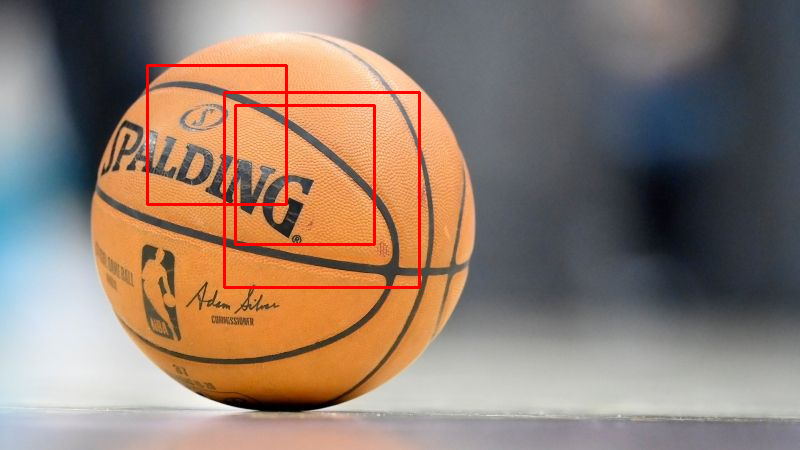

In [ ]:
img = cv2.imread('classifier_training_colab/Data/Image.jpg')
cls = cv2.CascadeClassifier('classifier_training_colab/xml/cascade.xml')
data = cls.detectMultiScale(img, minNeighbors=3, minSize=(15,15))
for x,y,w,h in data:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255),2)
cv2_imshow(img)